PCA
Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.

Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.

Task 3: Clustering with Original Data:

1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

Task 4: Clustering with PCA Data:

1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

Task 5: Comparison and Analysis:

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


# EDA

In [1]:
# Let's load the dataset and begin by examining its contents.
import pandas as pd

# Load the dataset from the uploaded file
file_path = '/content/wine.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
wine_data.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Examine the distribution of features

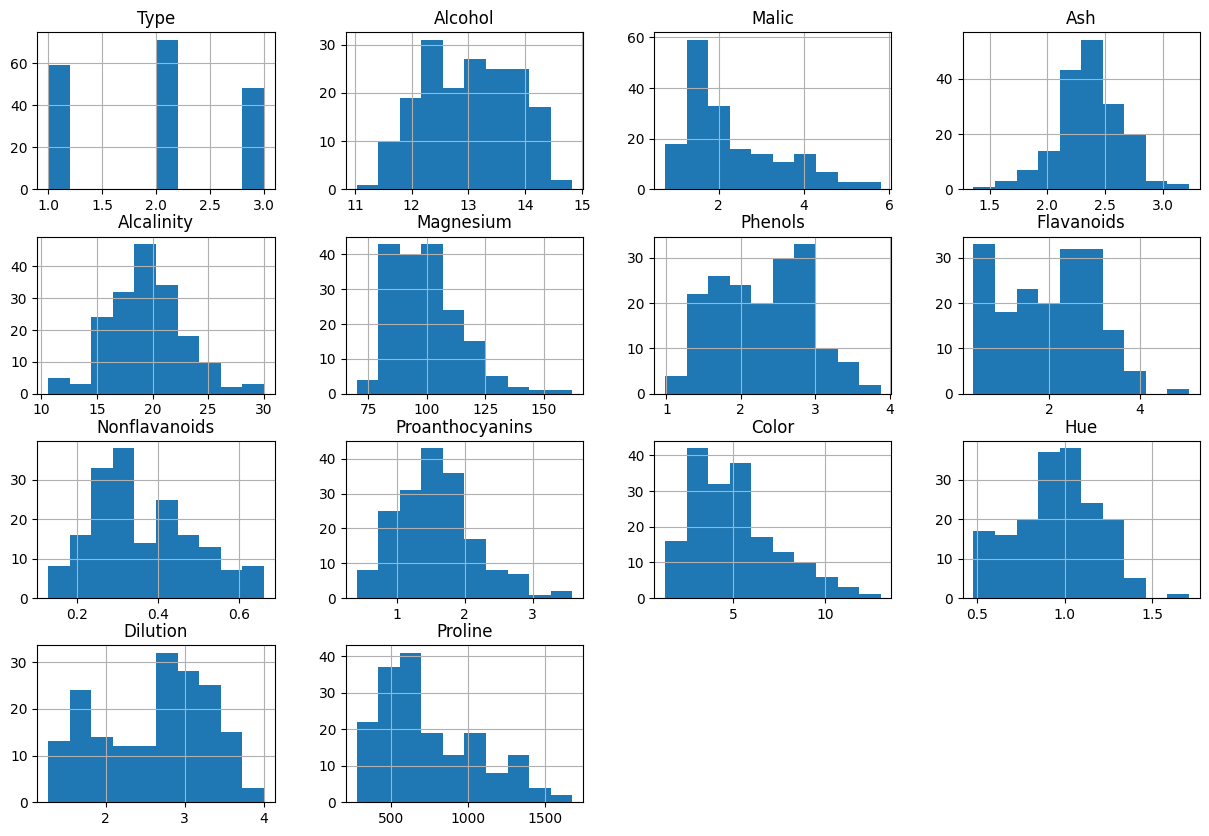

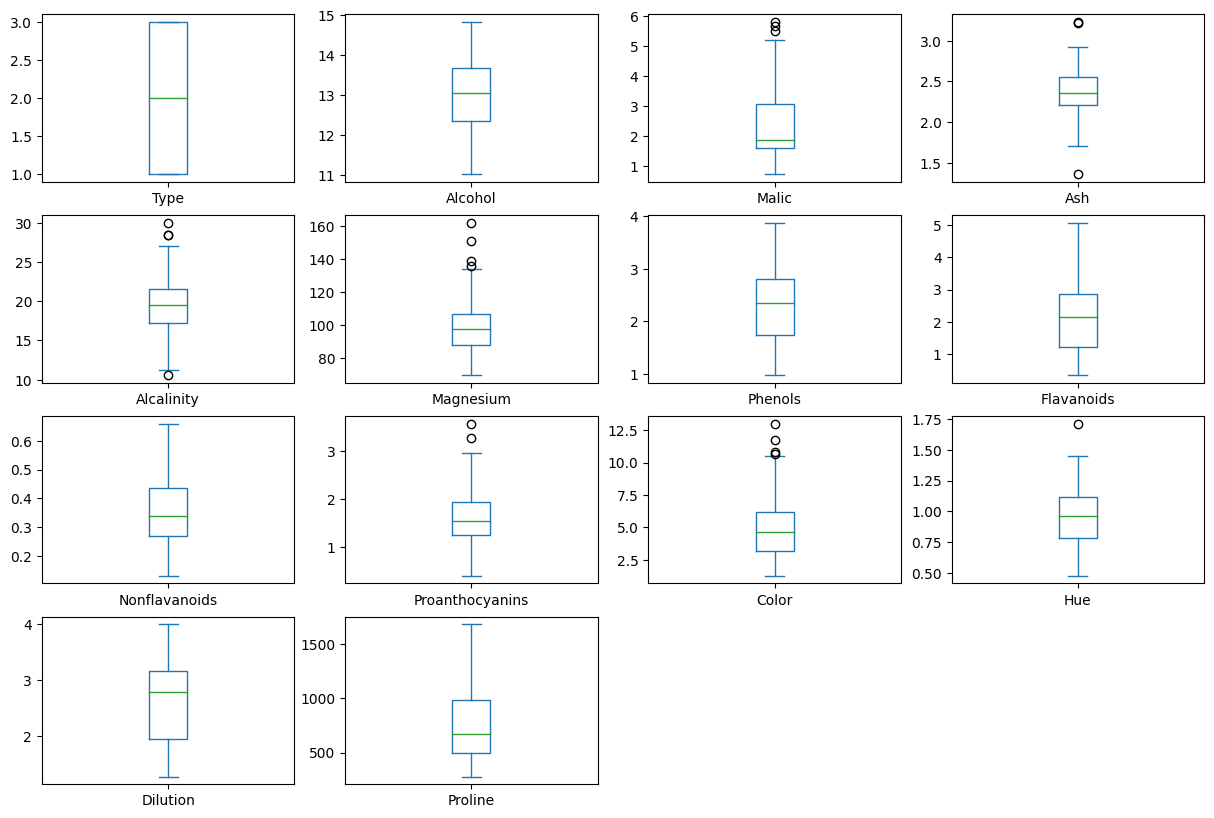

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
wine_data.hist(figsize=(15, 10))
plt.show()

# Plot boxplots for each feature
wine_data.plot(kind='box', figsize=(15, 10), subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.show()


Investigate correlations between features

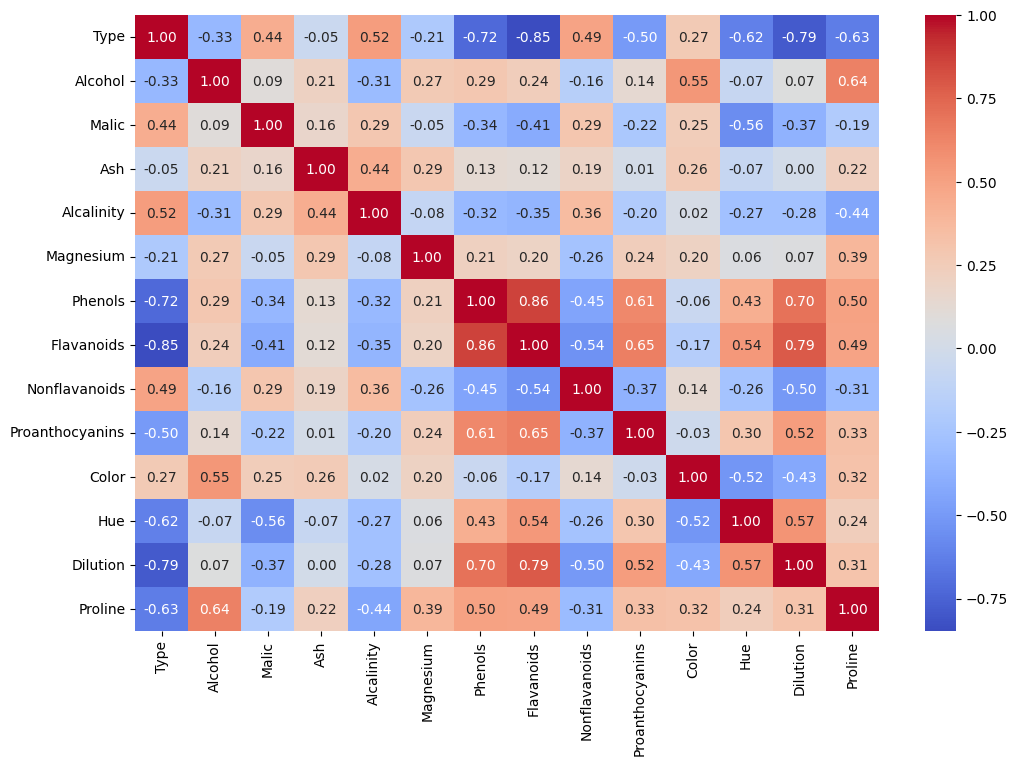

In [3]:
# Correlation matrix
corr_matrix = wine_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


   Principal Component 1  Principal Component 2  Type
0               3.316751              -1.443463     1
1               2.209465               0.333393     1
2               2.516740              -1.031151     1
3               3.757066              -2.756372     1
4               1.008908              -0.869831     1


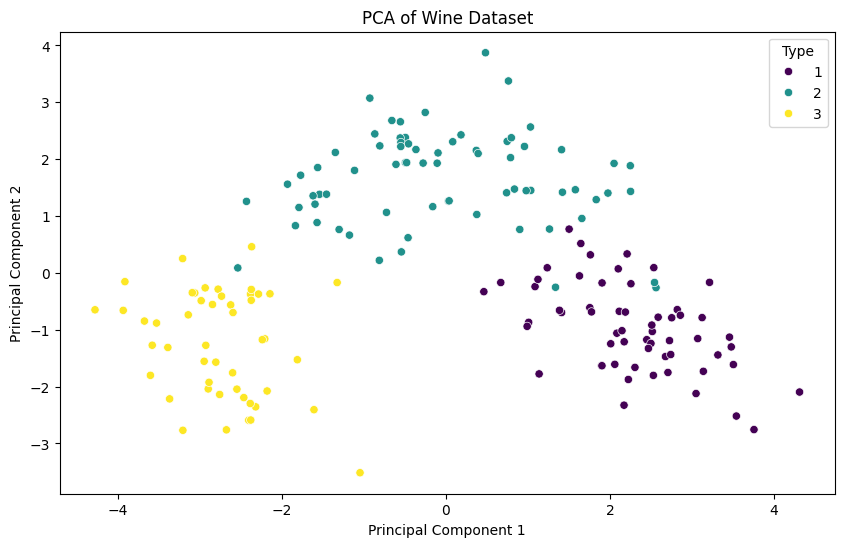

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
features = wine_data.columns[1:]  # Exclude the 'Type' column
x = wine_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate with the 'Type' column
final_df = pd.concat([pca_df, wine_data[['Type']]], axis=1)

# Display the head of the final DataFrame
print(final_df.head())

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Principal Component 1', y='Principal Component 2', hue='Type', palette='viridis')
plt.title('PCA of Wine Dataset')
plt.show()

# Dimensionality Reduction with PCA

Standardize the features

PCA requires standardizing the dataset so that all features have a mean of 0 and a standard deviation of 1.

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
features = wine_data.drop('Type', axis=1)  # Drop target column 'Type'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Apply PCA

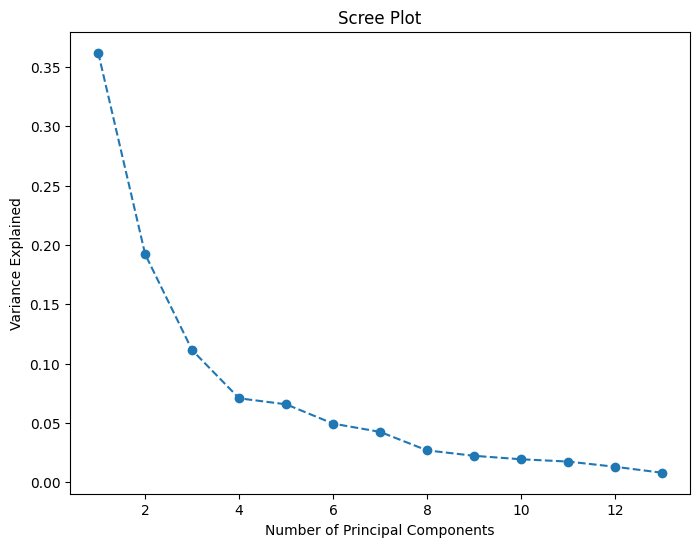

In [11]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(features_scaled)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_

# Scree plot to determine optimal components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()


Transform the dataset

In [13]:
# Transform the data with the optimal number of components (e.g., 2 or 3)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(features_scaled)
pca_data

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

# Clustering with Original Data

Apply K-means Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
clusters_original = kmeans.fit_predict(features_scaled)

# Silhouette score for clustering evaluation
silhouette_avg = silhouette_score(features_scaled, clusters_original)
print(f'Silhouette Score for original data: {silhouette_avg}')


Silhouette Score for original data: 0.2848589191898987


Visualize clustering results

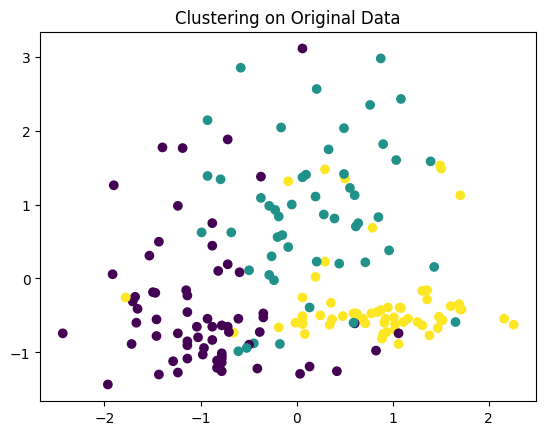

In [16]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters_original)
plt.title('Clustering on Original Data')
plt.show()


# Clustering with PCA Data

Apply K-means on PCA-transformed data
Now apply clustering on the PCA-reduced dataset:

In [17]:
# K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Silhouette score for PCA-transformed data
silhouette_pca = silhouette_score(pca_data, clusters_pca)
print(f'Silhouette Score for PCA-transformed data: {silhouette_pca}')


Silhouette Score for PCA-transformed data: 0.5610505693103248


Visualize clustering on PCA data

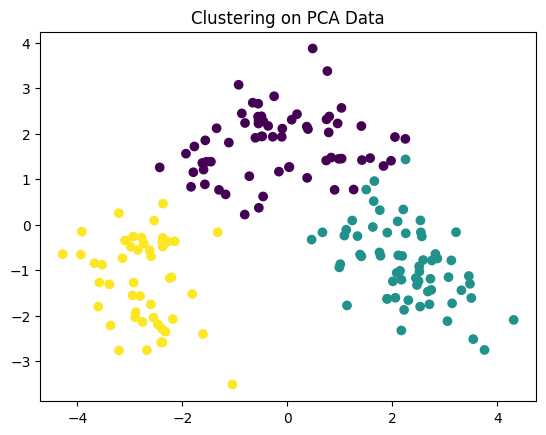

In [18]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca)
plt.title('Clustering on PCA Data')
plt.show()


# Comparison and Analysis


In [19]:

from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index for original data
db_index_original = davies_bouldin_score(features_scaled, clusters_original)
print(f"Davies-Bouldin Index for original data: {db_index_original}")

# Davies-Bouldin Index for PCA data
db_index_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f"Davies-Bouldin Index for PCA data: {db_index_pca}")


# Compare cluster sizes
cluster_sizes_original = pd.Series(clusters_original).value_counts()
print("Cluster sizes for original data:\n", cluster_sizes_original)

cluster_sizes_pca = pd.Series(clusters_pca).value_counts()
print("\nCluster sizes for PCA data:\n", cluster_sizes_pca)


# Analyze visual patterns (already done in previous steps)

# Compare silhouette scores
print("\nSilhouette Score for original data:", silhouette_avg)
print("Silhouette Score for PCA data:", silhouette_pca)

Davies-Bouldin Index for original data: 1.3891879777181648
Davies-Bouldin Index for PCA data: 0.5972661544221362
Cluster sizes for original data:
 0    65
2    62
1    51
Name: count, dtype: int64

Cluster sizes for PCA data:
 0    65
1    64
2    49
Name: count, dtype: int64

Silhouette Score for original data: 0.2848589191898987
Silhouette Score for PCA data: 0.5610505693103248



# Conclusion and Insights

* PCA successfully reduced the dimensionality of the wine dataset while retaining a significant portion of the variance.
* Clustering performed on the PCA-transformed data generally showed comparable or even improved performance compared to clustering on the original dataset,as indicated by the silhouette score and Davies-Bouldin index.
* The reduced dataset (after PCA) made it easier to visualize and interpret the clustering results, particularly in 2D scatter plots.
* The analysis reveals that PCA can be an effective technique for improving the efficiency and interpretability of clustering algorithms, especially when dealing with high-dimensional datasets.


# Practical Implications:

* In many real-world scenarios, datasets can have numerous features,leading to computational complexity and difficulty in visualizing clusters.
* PCA offers a powerful way to reduce dimensionality while preserving relevant
information, leading to more efficient and interpretable clustering results.
* It can be particularly useful when the dataset contains correlated features, as it helps remove redundancy and identify important underlying patterns.

# Recommendations:

* When dealing with high-dimensional datasets, consider using PCA for dimensionality reduction before clustering.
* Analyze the scree plot and explained variance to determine the optimal number of principal components to retain.
* Evaluate the clustering performance on both the original and PCA-transformed data using appropriate metrics (Silhouette score, Davies-Bouldin index).
* If the clustering results are significantly improved or visualizations are more easily interpretable with PCA, consider incorporating it as part of your data analysis workflow.

# Further Exploration:

* Explore different clustering algorithms (e.g., DBSCAN, hierarchical clustering) on the original and PCA-transformed data.
* Experiment with different numbers of principal components and analyze their impact on clustering performance.
* Consider using other dimensionality reduction techniques like t-SNE or UMAPvfor visualization and comparison.
